In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
from scipy import optimize

a)+b) see the pdf

In [2]:
source = "D:\Desktop\Master\Sem1\DS\hub\StatisticsAndDataAnalysis2023\exercises\data\decaytimes.csv."
decay_time_df = pd.read_csv(source,
                           names = ["d"])

In [6]:
t_array = decay_time_df["d"].to_numpy()
t_sorted = np.sort(t_array)
mean_t = np.sum(t_array)/len(t_array)
est_tau = np.log(2)*mean_t

decayf = lambda t, est_tau: (np.log(2)/est_tau)*np.exp(-t*(np.log(2)/est_tau))

In [7]:
max_t = np.round(np.max(t_array))
max_t = int(max_t)
res = 10000
t_lin = np.linspace(0,np.round(max_t),res)

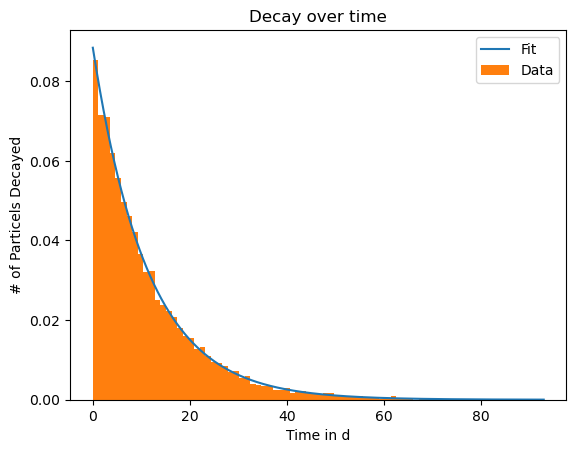

est_tau=7.841447087690194
Total number of particles = 10000


In [45]:
plt.plot(t_lin,decayf(t_lin,est_tau))
plt.hist(t_array, density = True, bins = 80)
plt.xlabel("Time in d")
plt.ylabel("# of Particels Decayed")
plt.title("Decay over time")
plt.legend(["Fit","Data"])
plt.show()
print(f"est_tau={est_tau}")
print(f"Total number of particles = {len(t_array)}")

v =10000.0 and tau = 7.841


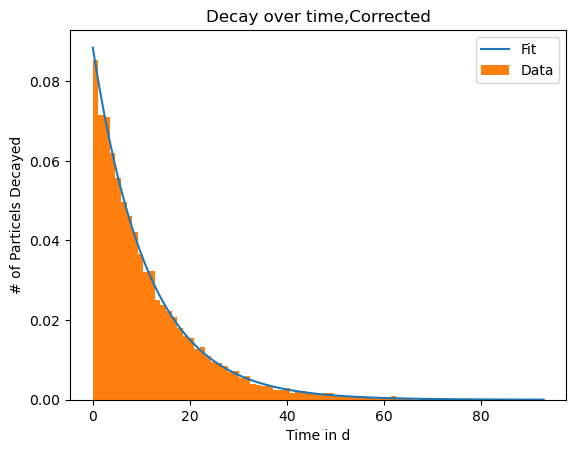

In [53]:
def correcture(parameter): 
    cor =  -parameter[0] + np.sum(np.log(parameter[0]*decayf(t_array,parameter[1])))
    return cor
res = optimize.minimize(lambda parameter: -correcture(parameter), [10000, 7.8], bounds = [(1, None), (1e-10, None)])
print(f"v ={np.round(res.x[0],decimals = 3)} and tau = {np.round(res.x[1],decimals = 3)}")

plt.plot(t_lin,decayf(t_lin,res.x[1]))
plt.hist(t_array, density = True, bins = 80)
plt.xlabel("Time in d")
plt.ylabel("# of Particels Decayed")
plt.title("Decay over time,Corrected")
plt.legend(["Fit","Data"])
plt.show()

C:\Users\Konka\AppData\Local\Temp\ipykernel_11788\3942751435.py:2: RuntimeWarning: divide by zero encountered in log
  cor =  -parameter[0] + np.sum(np.log(parameter[0]*decayf(t_array,parameter[1])))


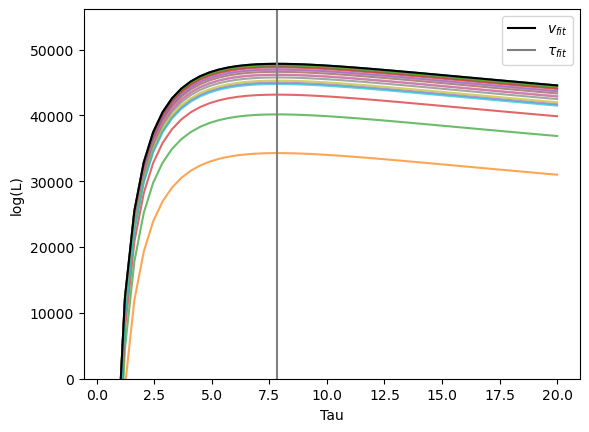

In [68]:
V = np.linspace(0, 20000, 20)
Tau = np.linspace(1e-10, 20, 50)

for v in V:
    logarithmics = [correcture([v, tau]) for tau in Tau]
    plt.plot(Tau, logarithmics, alpha = 0.7)

plt.plot(Tau, [correcture([v_min, tau]) for tau in Tau], color = "black", label = "$v_{fit}$")
plt.axvline(tau_min, color = "gray", label = r"$\tau_{fit}$")
plt.ylim(0, None)
plt.legend()
plt.xlabel("Tau")
plt.ylabel("log(L)")
plt.show()